# AutoML pipeline for Imbalanced Datasets
## Stefan Solarski AutoML WS22/23

### AutoML System Benchmark

In [15]:
from benchmark import run_automl_benchmark
from configuration import data_ids

"""
Run the benchmark for the AutoML System on the datasets in the data_ids list

Parameters
----------
data_ids : list
    List of dataset ids to run the benchmark on
model_type : str
    The type of model to use in the pipeline. Can be 'auto' to select best from defaults, 'brf', 'xgb', 'dt', or 'ensemble'
outer_folds : int
    The number of outer folds to use in the cross validation
inner_folds : int
    The number of inner folds to use in the cross validation
stop_time : int
    The time in seconds to run the automl system for
verbose : int
    Whether to print out details about the optimization (0 = no output, 1 = output)
num_points : int
    The number of points to use in the bayesian optimization
random_state : int
    The random state to use in the bayesian optimization

"""

run_automl_benchmark(
    data_ids=data_ids,
    model_type='auto', 
    outer_folds=3, 
    inner_folds=3,
    stop_time = 60*60,
    verbose=0, 
    num_points=2, 
    random_state=42
)


Running Classification on JapaneseVowels

  Outer fold #0
    Started fitting the models
    Checking the default models to choose which one to optimize

      Fitting BalancedRandomForest model
      Default score for BalancedRandomForest model: 0.976407371867272

      Fitting DecisionTree model
      Default score for DecisionTree model: 0.954914737201146

      Fitting XGBoost model
      Default score for XGBoost model: 0.9763766240978989

      Fitting Ensemble model
      Default score for Ensemble model: 0.9807338524453586

    Trying to optimize the Ensemble model
    This should take around 1.0 minutes
      Best score for tunned Ensemble model: 0.8202

  Evaluation on outer fold 0: 
  Accuracy: 0.9840
  Estimated accuracy from inner cv:  0.9807

  Outer fold #1
    Started fitting the models
    Checking the default models to choose which one to optimize

      Fitting BalancedRandomForest model
      Default score for BalancedRandomForest model: 0.9788338606988992

      F

### AutoML system plots

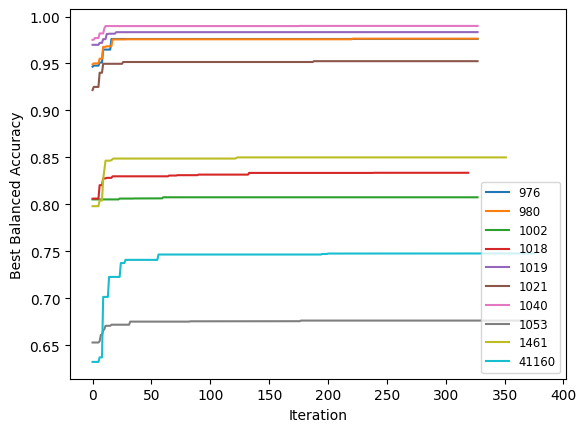

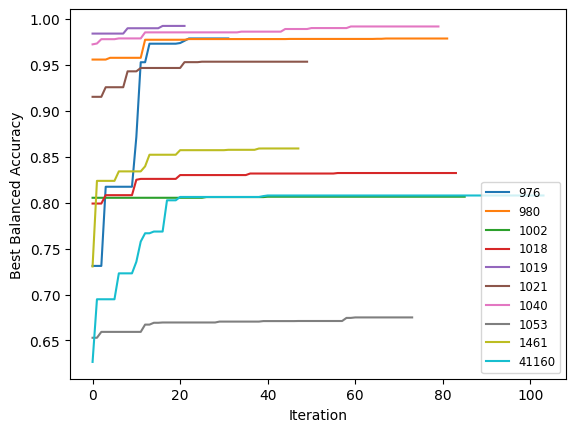

In [3]:
from plotting import plot_best_score, plot_best_brf_score
from configuration import data_ids

"""
Plot the best score (balanced accuracy) at each iteration for datasets in the data_ids list
Reads the tunner history from the benchmark where each dataset ran for 20 minutes


Parameters
----------
data_ids : list
    List of dataset ids to plot
"""

plot_best_brf_score(data_ids) # plots the best scores, per iteration, for 'brf' setting

plot_best_score(data_ids) # plots the best scores, per iteration, for 'auto' setting


### Display the scores in a table

In [6]:
from benchmark import dataframe_from_scores_dict, display_scores
from skopt import load
from configuration import data_ids

"""
Display the scores for the datasets in the data_ids list
Comparing DecisionTree, RandomForest and the AutoML system
"""

# Load the saved scores
scores_dict = load('backup/scores_dict_automl.pkl')

# Convert the scores to a dataframe
scores_df = dataframe_from_scores_dict(scores_dict, data_ids)

# Display the scores
display_scores(scores_df)


,976,980,1002,1018,1019,1021,1040,1053,1461,41160
Decision Tree,0.948524,0.917299,0.614408,0.631854,0.967682,0.912711,0.952086,0.608031,0.699523,0.692272
Random Forest,0.962148,0.938651,0.547442,0.554433,0.988729,0.932494,0.960291,0.593875,0.695272,0.570881
AutoML,0.981812,0.985962,0.803574,0.814248,0.996254,0.961816,0.991947,0.680996,0.863991,0.829583


### Experiments on algorithms with default parameters

In [1]:
from benchmark import run_default_model_benchmark

from models_cofig import models, scores_dict
from configuration import data_ids, scoring

""" 
Run the benchmark on the datasets in the data_ids list using the default
    parameter models from models_config.py
    
Parameters
----------
data_ids : list
    List of dataset ids to run the benchmark on
models : dict
    Dictionary of models to run the benchmark on
scores_dict : dict
    Dictionary of scores to use in the benchmark
scoring : str 
    The scoring metric to use in the benchmark
"""

# Benchmark the default parameter models on all datasets
run_default_model_benchmark(data_ids, models, scores_dict, scoring)


Running Classification tree on JapaneseVowels
Balanced Accuracy of Decision Tree: 0.948524318744773
Balanced Accuracy of Random Forest: 0.9621476730553727
Balanced Accuracy of XGBoost: 0.9796156941540093
Balanced Accuracy of XGBoost SMOTE: 0.9843841048889209
Balanced Accuracy of XGBoost SMOTETomek: 0.9841941334225015
Balanced Accuracy of XGBoost RandomUnderSampler: 0.9796470010871449
Balanced Accuracy of Random Forest SMOTE: 0.9775499166375341
Balanced Accuracy of XGBoost Weighted: 0.9885928458757528
Balanced Accuracy of Random Forest Weighted: 0.9648159377410174
Balanced Accuracy of RUSBoost: 0.953546050723046
Balanced Accuracy of Balanced Random Forest: 0.9815842535175244
Balanced Accuracy of Balanced Random Forest KNNImputer: 0.9815842535175244
Balanced Accuracy of XGBoost RandomUnderSampler KNNImputer: 0.9796470010871449
Balanced Accuracy of Voting Classifier: 0.9806756546378598

Running Classification tree on optdigits
Balanced Accuracy of Decision Tree: 0.9172991191744093
Balanc

### Result table

In [7]:
from benchmark import dataframe_from_scores_dict, display_scores
from skopt import load
from configuration import data_ids

"""
Display the scores for the datasets in the data_ids list
Comparing all the default parameter models
"""

# Load the saved scores
scores_dict = load('saved/scores_dict.pkl')

# Convert the scores to a dataframe
scores_df = dataframe_from_scores_dict(scores_dict, data_ids)

# Display the scores
display_scores(scores_df)


,976,980,1002,1018,1019,1021,1040,1053,1461,41160
Decision Tree,0.948524,0.917299,0.614408,0.631854,0.967682,0.912711,0.952086,0.608031,0.699523,0.692272
Random Forest,0.962148,0.938651,0.547442,0.554433,0.988729,0.932494,0.960291,0.593875,0.695272,0.570881
XGBoost,0.979616,0.962724,0.577647,0.590694,0.991709,0.926929,0.981293,0.590267,0.722712,0.669650
XGBoost SMOTE,0.984384,0.974540,0.589217,0.603487,0.994645,0.939245,0.987767,0.606475,0.729861,0.669405
XGBoost SMOTETomek,0.984194,0.974540,0.596477,0.608257,0.994645,0.942010,0.987767,0.621131,0.740505,0.668629
XGBoost RandomUnderSampler,0.979647,0.978530,0.777127,0.793387,0.987943,0.954750,0.990335,0.655834,0.855513,0.818895
Random Forest SMOTE,0.977550,0.956805,0.597810,0.589607,0.990110,0.947861,0.985133,0.636282,0.720188,0.590460
XGBoost Weighted,0.988593,0.985105,0.529276,0.539355,0.994189,0.892660,0.990528,0.597424,0.846119,0.567952
Random Forest Weighted,0.964816,0.930662,0.539498,0.537498,0.983953,0.924280,0.976257,0.587361,0.658417,0.559600
RUSBoost,0.953546,0.947335,0.762507,0.784363,0.981539,0.861029,0.933950,0.578808,0.826289,0.708962
